# ***California Fire Detection Exploratory Analysis***




---


In [1]:
!pip install plotly
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install geopandas --upgrade
!pip install plotly-geo

     |████████████████████████████████| 888 kB 31.9 MB/s 
     |████████████████████████████████| 6.3 MB 56.8 MB/s 
     |████████████████████████████████| 15.4 MB 41.4 MB/s 
     |████████████████████████████████| 176 kB 31.4 MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20493 sha256=656e2d792bc36378b1171f5f10c03f72103dc1c57a469b180a9c71f51ee9398f
  Stored in directory: /root/.cache/pip/wheels/aa/cb/ed/c4af42e7718157f9a76dea841c585e0577742ffed5a5b17d32
Successfully built pyshp
     |████████████████████████████████| 223 kB 27.4 MB/s 
  Created wheel for shapely: filename=Shapely-1.6.3-cp37-cp37m-linux_x86_64.whl size=635711 sha256=75fcfc369f58adc53f6c216507cb8eafef968812b9df1001af00d32cef831ccb
  Stored in directory: /root/.cache/pip/wheels/89/9f/1e/de1b1c770313c6a9838cc9c4da4c59f5b2db78b34078d29d01
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

import folium
import math

import plotly.figure_factory as ff
import plotly.express as px

California is one of the places having the most deadliest and destructive wildfire seasons. The dataset contains the list of Wildfires that has occurred in California between 2013 and 2019. The dataset contains the location where wildfires have occurred including the County name, latitude and longitude values and also details on when the wildfire has started.

This data helps to generate insights on what locations in California are under fire threat, what time do Wildfires usually occur and how frequent and devastating they are!!

## **Explore Fires Dataset**

In [3]:
dataset = pd.read_csv('California_Fire_Cleaned.csv')
dataset.head(15)

,Unnamed: 0,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Featured,Final,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,Started,Status,Active Time,FIPS
0,0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,2013-09-06 18:30:00,NaN,False,True,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,2013-08-17 15:25:00,Finalized,20 days 03:05:00,6109.0
1,1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,2013-06-08 18:30:00,NaN,False,True,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,2013-05-30 15:28:00,Finalized,9 days 03:02:00,6037.0
2,2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-07-30 18:00:00,NaN,False,True,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,2013-07-15 13:43:00,Finalized,15 days 04:17:00,6065.0
3,3,27440.0,Tahoe National Forest,2013,False,Placer,31,2013-08-30 08:00:00,NaN,False,True,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,2013-08-10 16:30:00,Finalized,19 days 15:30:00,6061.0
4,4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,2013-05-11 06:30:00,NaN,False,True,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2013-05-02 07:01:00,Finalized,8 days 23:29:00,6111.0
5,5,22992.0,Sierra National Forest,2013,False,Fresno,10,2013-09-24 20:15:00,NaN,False,True,NaN,37.279000,Seven miles north of Big Creek,-119.318000,False,Aspen Fire,100.0,2013-07-22 22:15:00,Finalized,63 days 22:00:00,6019.0
6,6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-08-12 18:00:00,NaN,False,True,26.0,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,100.0,2013-08-07 14:05:00,Finalized,5 days 03:55:00,6065.0
7,7,14754.0,Klamath National Forest,2013,False,Siskiyou,47,2013-08-31 06:45:00,NaN,False,True,NaN,41.320000,"North Fork of the Salmon River, West of Sawyer...",-123.176000,False,Salmon River Complex,100.0,2013-07-31 22:00:00,Finalized,30 days 08:45:00,6093.0
8,8,12503.0,Six Rivers National Forest,2013,False,Humboldt,12,2013-08-12 12:00:00,NaN,False,True,NaN,41.035000,Tish Tang Ridge east of Hoopa Valley Reservation,-123.488000,False,Corral Complex,100.0,2013-08-10 11:40:00,Finalized,2 days 00:20:00,6023.0
9,9,11429.0,CAL FIRE Tehama-Glenn Unit,2013,True,Tehama,52,2013-08-29 16:45:00,NaN,False,True,5.0,40.042630,"Near Deer Creek, 12 miles east of Los Molinos.",-121.853970,True,Deer Fire,100.0,2013-08-23 14:15:00,Finalized,6 days 02:30:00,6103.0


In [4]:
dataset.columns

Index(['Unnamed: 0', 'AcresBurned', 'AdminUnit', 'ArchiveYear',
       'CalFireIncident', 'Counties', 'CountyIds', 'Extinguished',
       'Fatalities', 'Featured', 'Final', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained', 'Started',
       'Status', 'Active Time', 'FIPS'],
      dtype='object')

In [6]:
dataset.dtypes

Unnamed: 0            int64
AcresBurned         float64
AdminUnit            object
ArchiveYear           int64
CalFireIncident        bool
Counties             object
CountyIds            object
Extinguished         object
Fatalities          float64
Featured               bool
Final                  bool
Injuries            float64
Latitude            float64
Location             object
Longitude           float64
MajorIncident          bool
Name                 object
PercentContained    float64
Started              object
Status               object
Active Time          object
FIPS                float64
dtype: object

In [41]:
map = folium.Map(location=[37.160317,-120.621407], tiles="Open Street Map", zoom_start=7, height = "75%", width = "100%")
for i in range(len(dataset)):
    folium.Circle(
        location=[dataset.loc[i,'Latitude'], dataset.loc[i,'Longitude']],
        radius=math.sqrt(float(dataset.loc[i,'AcresBurned'])*4046.86/math.pi), # Convert acres to meters
        tooltip=str(dataset.loc[i,'Name'])+', '+str(dataset.loc[i,'ArchiveYear']),
        color="#d4763b",
        fill=True,
        fill_color="#d4763b",
    ).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:25px"><b>Geospatial distribution of wildfires in California</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))    
    
map

*Looking at the geospatial distribution of wildfires in California. Most of the small wildfires occur in areas away from larger forests. Most of them occur near mountains* \
\
*Note : Some of the data is shown to be in areas outside the state of California. We will make sure to clean them for modeling purposes.*


In [8]:
v = dataset[['Counties','FIPS']].value_counts().to_frame()
v = v.reset_index()
v.columns =  ['County', 'FIPS', 'TotalFires']
v

,County,FIPS,TotalFires
0,Riverside,6065.0,146
1,San Diego,6073.0,89
2,Butte,6007.0,66
3,Shasta,6089.0,64
4,San Luis Obispo,6079.0,64
5,Kern,6029.0,62
6,Fresno,6019.0,57
7,Siskiyou,6093.0,57
8,San Bernardino,6071.0,53
9,Tehama,6103.0,51


In [9]:
v = v.dropna(how='any',axis=0) 

values = v['TotalFires'].tolist()
fips = v['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#002047","#2b82ed","#0057a3","#6190c9","#c2ddff"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=False,
    plot_bgcolor='rgb(245, 245, 245)',
    paper_bgcolor='rgb(245, 245, 245)',
    legend_title='Total Fires by County',
    county_outline={'color': 'rgb(181, 181, 181)', 'width': 1},
    state_outline={'color': 'rgb(181, 181, 181)', 'width': 1},
    exponent_format=True,
)
fig.layout.template = None
fig.show()



1.   *Riverside had the most wild fires* *Imperial County did not have any wild fires*
2.   *Imperial County did not have any wild fires*



*Proof that imperial county did not have any wild fires*

In [12]:
dataset[dataset["Counties"] == "Imperial"] # Proof that imperial county did not have wild fires

,Unnamed: 0,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Featured,Final,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,Started,Status,Active Time,FIPS,Month


In [10]:
dataset['Month'] = [i.month for i in pd.to_datetime(dataset['Started'])]
new_Data = dataset.groupby(['ArchiveYear', 'Month'])['Counties'].count().reset_index()
new_Data.rename(columns = {"Counties" : "Wild Fire Count"}, inplace = True)

In [11]:
fig = px.line(new_Data, x="Month", y="Wild Fire Count", color = "ArchiveYear", title='Wild Fire Frequency over the month in a given year')
fig.show()

More wild fires seem to be occuring during the summer time. Makes sense as during this time the temperatures are high and it is more dry making wild fires a more likely occurence.

In [13]:
dataset['Month'] = [i.month for i in pd.to_datetime(dataset['Started'])]
new_Data = dataset.groupby(['ArchiveYear', 'Month'])['AcresBurned'].sum().reset_index()

In [14]:
fig = px.line(new_Data, x="Month", y="AcresBurned", color = "ArchiveYear", title='Total Acres Burned over the month in a given year')
fig.show()

In [15]:
new_Data = dataset.groupby(['ArchiveYear'])['AcresBurned'].sum().reset_index()
fig = px.line(new_Data, x="ArchiveYear", y="AcresBurned", title='Total Acres Burned over a given year')
fig.show()

As before more acres are burned during the summer time similar how most wild fires occured during the summer time. In this case during the year of 2018 we saw the most number of collective acres burned. This means that summer time is most vulnerable time for California for vast number of wilfires as will as the greatest devastation.

## **Explore Weather dataset**

In [16]:
weather = pd.read_csv("weather_data.csv", index_col = 0)

In [17]:
weather['hum avg'] = (weather["Humidity Day One"] + weather['Humidity Day Two'] + weather['Humidity Day Three'] + weather['Humidity Day Four'] + weather['Humidity Day Five'])/5

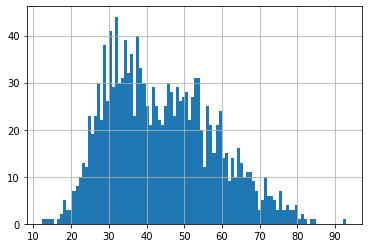

In [18]:
weather['hum avg'].hist(bins = 100)

*When most of the fires occur, the average humidity of the last 5 days before is less than 50%. This is very much interesting as lower the humidity meeans greater tha chance of fire spreading more quickly or forming in the first place*

In [21]:
weather['temp avg'] = (weather["Temp Day One"] + weather['Temp Day Two'] + weather['Temp Day Three'] + weather['Temp Day Four'] + weather['Temp Day Five'])/5

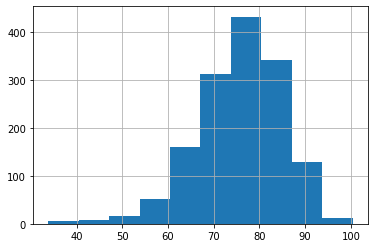

In [22]:
weather['temp avg'].hist(bins = 10)

*When most of the fires occur, the average temperature of the last 5 days before is more than 70 F. Sometimes, it even hits 90 F.*

In [25]:
weather['Month'] = [i.month for i in pd.to_datetime(weather['Started'])]
weather['Year'] = [i.year for i in pd.to_datetime(weather['Started'])]
new_Data = weather.groupby(['Year', 'Month'])['temp avg'].mean().reset_index()

fig = px.line(new_Data, x="Month", y="temp avg", color = 'Year', title='Average Temperatures over the months in a given year')
fig.show()

In [27]:
weather['Month'] = [i.month for i in pd.to_datetime(weather['Started'])]
weather['Year'] = [i.year for i in pd.to_datetime(weather['Started'])]
new_Data = weather.groupby(['Year', 'Month'])['hum avg'].mean().reset_index()

fig = px.line(new_Data, x="Month", y="hum avg", color = 'Year', title='Average humidity over the months in a given year')
fig.show()

*These two graphs show an interesting pattern. During the summer time the average temperature is high and the humidity is low (certain other months throughout the year have smaller avg humidity but low avg temperature as well). And this is very much consistent with the previous graphs where we observed that most of the wild fires occur during the summer time.*


Text(0.5, 1.0, 'Day Five')

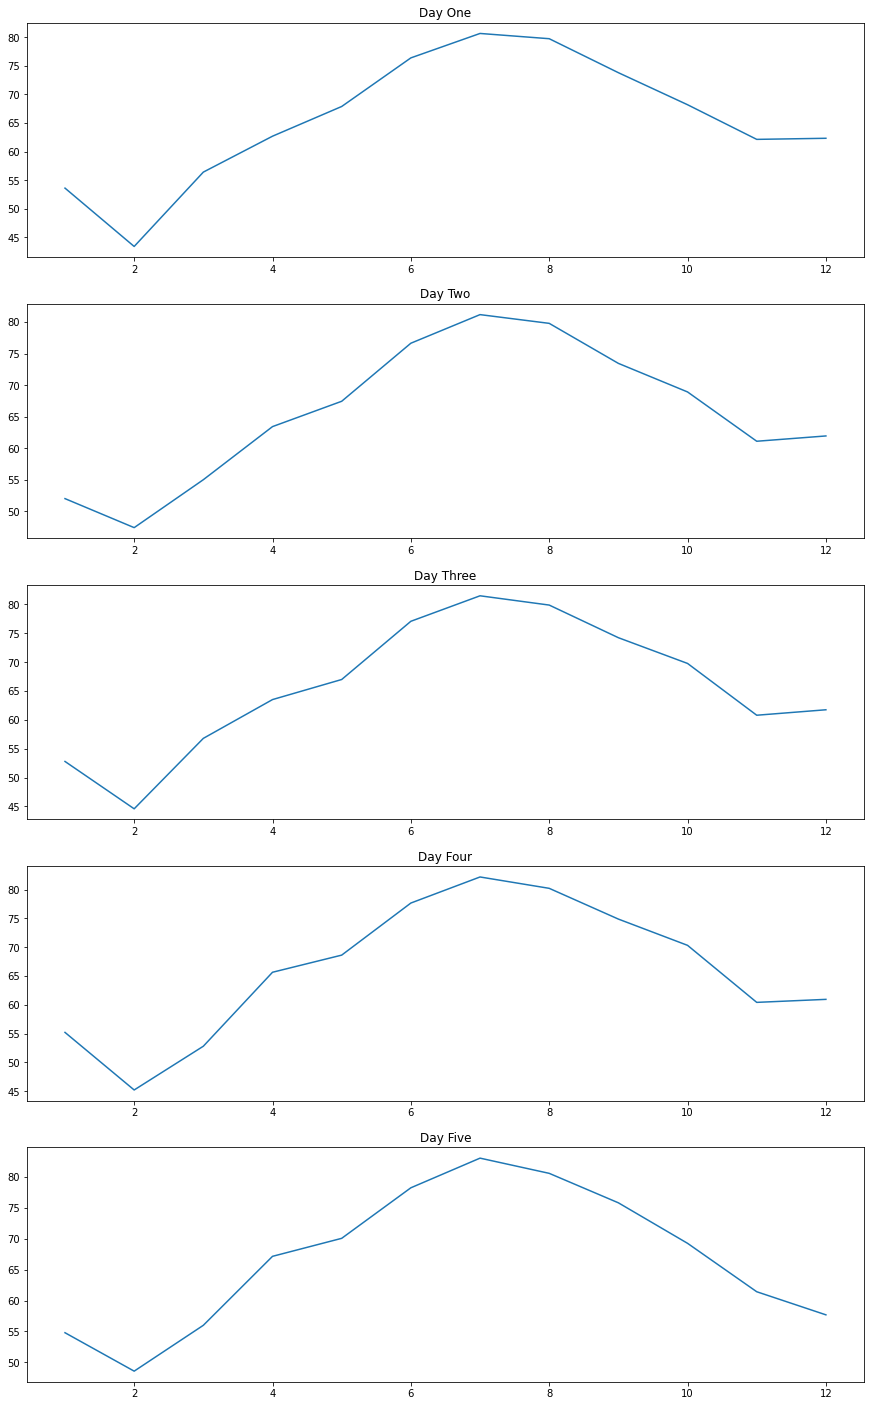

In [28]:
plt.subplots(5, 1, figsize=(15,25))
plt.subplot(5, 1, 1)
new_Data = weather.groupby(['Month'])['Temp Day One'].mean().reset_index()
plt.plot(new_Data['Month'], new_Data['Temp Day One'])
plt.title("Day One")

plt.subplot(5, 1, 2)
new_Data_One = weather.groupby(['Month'])['Temp Day Two'].mean().reset_index()
plt.plot(new_Data_One['Month'], new_Data_One['Temp Day Two'])
plt.title("Day Two")

plt.subplot(5, 1, 3)
new_Data_Two = weather.groupby(['Month'])['Temp Day Three'].mean().reset_index()
plt.plot(new_Data_Two['Month'], new_Data_Two['Temp Day Three'])
plt.title("Day Three")

plt.subplot(5, 1, 4)
new_Data = weather.groupby(['Month'])['Temp Day Four'].mean().reset_index()
plt.plot(new_Data['Month'], new_Data['Temp Day Four'])
plt.title("Day Four")

plt.subplot(5, 1, 5)
new_Data = weather.groupby(['Month'])['Temp Day Five'].mean().reset_index()
plt.plot(new_Data['Month'], new_Data['Temp Day Five'])
plt.title("Day Five")

*The interesting thing is that each of the days before a fire occured, the avg temperature over the month over the years looks the same. Not sure if it is a coincidence but it is something worth exploring.* \
*This is very odd because although we expect to be somewhat be the same throughout the years, the facts that the average of all the days are the same is very strange.*

### In conclusion, during our exploration of the datasets we came to certain conclusions. The first of which was that most of the wildfires occur during the summer time. This statement was furthur reinforced with our observation that during the summer times the average humidity is very low and the average temperatures are very high. The second observation we made was that the average temperature of the 5 days before the fire started throughout the month over the years are the same. Now we do not know why this is, but it is something that needs furthur exploration. Lastly, we noticed that within the geospatial data certain wilfires seems to be occuring in the same areas, again not sure why as of yet. But furthur exploration could provide some explanation into this as well the other things we identified.